# DIGIT **RECOGNISER**


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
import numpy as np
import os
from os import listdir
import cv2
from cv2 import imshow
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_dataop(dir_list, image_size):
    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in listdir(directory):
            file_path = os.path.join(directory, filename)
            image = cv2.imread(file_path)
            if image is None:
                print(f"Warning: {file_path} could not be read.")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            image = image /255.0
            X.append(image)

            if directory.endswith('1'):
                y.append([1])
            elif directory.endswith('2'):
                y.append([2])
            elif directory.endswith('3'):
                y.append([3])
            elif directory.endswith('4'):
                y.append([4])
            elif directory.endswith('5'):
                y.append([5])
            elif directory.endswith('6'):
                y.append([6])
            elif directory.endswith('7'):
                y.append([7])
            elif directory.endswith('8'):
                y.append([8])
            elif directory.endswith('9'):
                y.append([9])



    X = np.array(X)
    y = np.array(y)

    X, y = shuffle(X, y)

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')

    return X, y

In [ ]:
path_1 = '/content/drive/MyDrive/DIGITSDATASET/1'
path_2 = '/content/drive/MyDrive/DIGITSDATASET/2'
path_3 = '/content/drive/MyDrive/DIGITSDATASET/3'
path_4 = '/content/drive/MyDrive/DIGITSDATASET/4'
path_5 = '/content/drive/MyDrive/DIGITSDATASET/5'
path_6 = '/content/drive/MyDrive/DIGITSDATASET/6'
path_7 = '/content/drive/MyDrive/DIGITSDATASET/7'
path_8 = '/content/drive/MyDrive/DIGITSDATASET/8'
path_9 = '/content/drive/MyDrive/DIGITSDATASET/9'

IMG_WIDTH, IMG_HEIGHT = (28, 28)

total_images,total_targets= load_dataop([path_1, path_2, path_3,path_4,path_5,path_6,path_7,path_8,path_9], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 4684
X shape is: (4684, 28, 28)
y shape is: (4684, 1)


In [ ]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:
train_images, val_test_images, train_labels, val_test_labels = train_test_split(total_images, total_targets, test_size=0.3)
test_images, val_images, test_labels, val_labels = train_test_split(val_test_images, val_test_labels, test_size=0.5)

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
82/82 [==============================] - 3s 34ms/step - loss: 0.5635 - accuracy: 0.8192 - val_loss: 0.5965 - val_accuracy: 0.8125
Epoch 2/10
82/82 [==============================] - 4s 53ms/step - loss: 0.4575 - accuracy: 0.8551 - val_loss: 0.5331 - val_accuracy: 0.8262
Epoch 3/10
82/82 [==============================] - 3s 32ms/step - loss: 0.3858 - accuracy: 0.8738 - val_loss: 0.4489 - val_accuracy: 0.8521
Epoch 4/10
82/82 [==============================] - 2s 30ms/step - loss: 0.3210 - accuracy: 0.8982 - val_loss: 0.3900 - val_accuracy: 0.8674
Epoch 5/10
82/82 [==============================] - 2s 29ms/step - loss: 0.2794 - accuracy: 0.9111 - val_loss: 0.3665 - val_accuracy: 0.8674
Epoch 6/10
82/82 [==============================] - 2s 28ms/step - loss: 0.2425 - accuracy: 0.9199 - val_loss: 0.4104 - val_accuracy: 0.8567
Epoch 7/10
82/82 [==============================] - 4s 45ms/step - loss: 0.2154 - accuracy: 0.9279 - val_loss: 0.3053 - val_accuracy: 0.9009
Epoch 8/10
82

# **OPERATOR RECOGNISER**

In [ ]:
def load_data(dir_list, image_size):
    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in listdir(directory):
            file_path = os.path.join(directory, filename)
            image = cv2.imread(file_path)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            image = image /255.0
            X.append(image)

            if directory.endswith('div'):
                y.append([0,0,0,1])
            elif directory.endswith('mul'):
                y.append([0,0,1,0])
            elif directory.endswith('sub'):
                y.append([0,1,0,0])
            elif directory.endswith('add'):
                y.append([1,0,0,0])

    X = np.array(X)
    y = np.array(y)

    X, y = shuffle(X, y)

    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')

    return X, y

In [ ]:
path_add = '/content/drive/MyDrive/OPERATORDATASETFINAL/add'
path_sub = '/content/drive/MyDrive/OPERATORDATASETFINAL/sub'
path_mul = '/content/drive/MyDrive/OPERATORDATASETFINAL/mul'
path_div = '/content/drive/MyDrive/OPERATORDATASETFINAL/div'

IMG_WIDTH, IMG_HEIGHT = (28, 28)

X, y = load_data([path_add, path_sub, path_mul,path_div], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 2309
X shape is: (2309, 28, 28, 3)
y shape is: (2309, 4)


In [ ]:
modelop = models.Sequential()

modelop.add(layers.Conv2D(32, (3, 3), strides = (1, 1), activation='relu', padding='same', input_shape=(28, 28, 3)))
modelop.add(layers.MaxPooling2D((4, 4)))

modelop.add(layers.Flatten())
modelop.add(layers.Dense(128, activation='relu'))
modelop.add(layers.Dense(4, activation='softmax'))


In [ ]:
modelop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

In [ ]:
modelop.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_val, y_val))

Epoch 1/10
51/51 [==============================] - 2s 24ms/step - loss: 0.8183 - accuracy: 0.7085 - val_loss: 0.4669 - val_accuracy: 0.8329
Epoch 2/10
51/51 [==============================] - 1s 20ms/step - loss: 0.3668 - accuracy: 0.8676 - val_loss: 0.3256 - val_accuracy: 0.8876
Epoch 3/10
51/51 [==============================] - 1s 20ms/step - loss: 0.2478 - accuracy: 0.9177 - val_loss: 0.2965 - val_accuracy: 0.9049
Epoch 4/10
51/51 [==============================] - 1s 18ms/step - loss: 0.1976 - accuracy: 0.9332 - val_loss: 0.2200 - val_accuracy: 0.9395
Epoch 5/10
51/51 [==============================] - 1s 20ms/step - loss: 0.1240 - accuracy: 0.9691 - val_loss: 0.1389 - val_accuracy: 0.9654
Epoch 6/10
51/51 [==============================] - 1s 18ms/step - loss: 0.1001 - accuracy: 0.9771 - val_loss: 0.1214 - val_accuracy: 0.9625
Epoch 7/10
51/51 [==============================] - 1s 19ms/step - loss: 0.0716 - accuracy: 0.9889 - val_loss: 0.1059 - val_accuracy: 0.9712
Epoch 8/10
51

# Operand & Operation

array([[[ 51,  45,  32],
        [ 51,  45,  32],
        [ 51,  45,  32],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 253, 244],
        [255, 253, 244],
        [255, 253, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
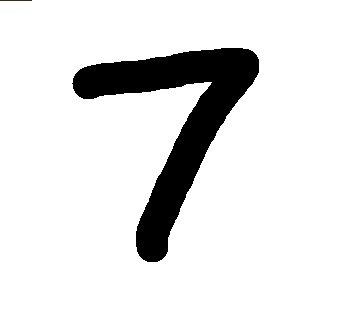

In [ ]:
from keras.preprocessing import image
import cv2
from cv2 import imshow
image_pathfin = 'PredictOperation.jpg'
imagefin = cv2.imread(image_pathfin)

height, width, _ = imagefin.shape

grid=width//3
grid1 = imagefin[:, 0:grid]
grid2 = imagefin[:, grid:grid*2]
grid3 = imagefin[:, grid*2:width]

grid1

OPERAND1

In [ ]:
test_img = cv2.resize(grid1, (28, 28), interpolation=cv2.INTER_AREA)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img = np.expand_dims(test_img, axis=0)
test_img = np.expand_dims(test_img, axis=-1)
test_img = test_img / 255.0
result = model.predict(test_img)
predicted_class = np.argmax(result, axis=1)
o1 = predicted_class
print(result)
print(o1)
est_img_display = (test_img[0, :, :, 0] * 255).astype(np.uint8)
est_img_display

1/1 [==============================] - 0s 36ms/step
[[1.2926802e-14 7.6032425e-09 9.0226393e-08 5.0152689e-08 2.2663686e-09
  1.2375883e-08 4.6312863e-11 9.9998045e-01 9.6071098e-09 1.9399669e-05]]
[7]


array([[235, 235, 243, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250,
        228, 167, 116,  93,  73,  41,  39,  90, 246, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 242, 168, 120,  98,  69,  54,  10,
          0,   0,   0,   0,   0,   0,   0,   0, 189, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255,  50,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   6, 221, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 252,   9,   0,   0,   0,   0,   5,  30,
         78, 114, 182, 207,  36,   0,   0, 126, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 179, 120, 186, 212, 242, 249, 255,
        255, 255, 255,  99,   0,   0,  71, 250, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 202,   4,   0,  22, 233, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254,  64,   0,   0, 159, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 195,   0,   0,  52, 254, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255,  74,   0,   0, 185, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        219,   4,   0,  50, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        110,   0,   0, 159, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 223,
          7,   0,  21, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 130,
          0,   0, 133, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252,  36,
          0,  10, 233, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 178,   0,
          0,  86, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  84,   0,
          1, 200, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  43,   0,
         36, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  62,   0,
         58, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 201,  94,
        194, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

OPERAND2

In [ ]:
test_img = cv2.resize(grid3, (28, 28), interpolation=cv2.INTER_AREA)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img = np.expand_dims(test_img, axis=0)
test_img = np.expand_dims(test_img, axis=-1)
test_img = test_img / 255.0
result = model.predict(test_img)
predicted_class = np.argmax(result, axis=1)
o2 = predicted_class
print(result)
print(o2)
est_img_display = (test_img[0, :, :, 0] * 255).astype(np.uint8)
est_img_display

1/1 [==============================] - 0s 21ms/step
[[3.4048207e-16 6.5560285e-10 9.9961460e-01 6.6917171e-05 2.5222212e-08
  4.9806777e-11 6.9350868e-08 3.1792230e-04 2.8451754e-09 3.9745458e-07]]
[2]


array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 227, 145, 104,  85,  85,
         90, 139, 229, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 253, 112,   5,   0,   0,   0,   0,
          0,   0,   8, 129, 250, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 160,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  73, 247, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 150,   0,   3, 118, 197, 227, 230,
        210, 109,   6,   0,   0, 135, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 249, 145, 184, 255, 255, 255, 255,
        255, 255, 198,  12,   0,  47, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255,  71,   0,  22, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255,  71,   0,  22, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 231,   9,   0,  36, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254,  71,   0,   0, 121, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 122,   0,   0,  35, 243, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        180,   1,   0,   8, 204, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 210,
         17,   0,   0, 154, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 244,  46,
          0,   0, 110, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,  74,   0,
          0,  56, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  97,   0,   0,
         20, 222, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 252, 119,   0,   0,  10,
        202, 255, 255, 255, 255, 249, 239, 250, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 241,  73,   0,   0,   2, 136,
        174, 145, 105,  78,  32,   2,   0,  17, 215, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 250,  63,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 167, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 159,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  13,  48,  66, 107, 244, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 159,   0,   1,  48,  57,  72,  91,
        124, 151, 194, 219, 254, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 253, 171, 188, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

In [ ]:
print(o1+o2)

[14]


OPERATOR

In [ ]:
test_img = cv2.resize(grid2, (28, 28), interpolation=cv2.INTER_AREA)
test_img = np.expand_dims(test_img, axis=0)

test_img = test_img / 255.0
result = modelop.predict(test_img)
predicted_class = np.argmax(result, axis=1)
o3 = predicted_class
print(result)
print(o3)
est_img_display = (test_img[0, :, :, 0] * 255).astype(np.uint8)
est_img_display

1/1 [==============================] - 0s 23ms/step
[[3.9121881e-04 9.9875367e-01 2.7230446e-05 8.2787540e-04]]
[1]


array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 247, 227,
        227, 227, 227, 227, 231, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 216, 110,  47,  38,  25,   7,   0,
          0,   0,   0,   0,   0, 146, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 253,  24,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  97, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 253,  23,   0,   3,  22,  29,  44,  71,
         88,  88,  88,  88,  93, 215, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 219, 170, 230, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

# FINAL

In [ ]:
if o3 == 0:
    print(f"{o1} + {o2} = {o1 + o2}")
elif o3 == 1:
    print(f"{o1} - {o2} = {o1 - o2}")
elif o3 == 2:
    print(f"{o1} * {o2} = {o1 * o2}")
elif o3 == 3:
    print(f"{o1} / {o2} = {o1 / o2}")

[7] - [2] = [5]
